In [1]:
# Leer archivo csv, separado por ";"
headers = read.csv(file="output-2015-diarios.csv", header = F, nrows = 1, as.is = T)
df_dist1 = read.csv(file="output-2015-diarios.csv", skip = 2, header = F)
colnames(df_dist1)= headers
#df_dist1 <- read.csv(file="output-2015-diarios.csv", header=TRUE, skip=1, sep=",", stringsAsFactors=FALSE)


In [2]:
require(lubridate)
df_dist1$Hour <- as.numeric(df_dist1$Hour, units="hours")
df_dist1$Ndate <- as.Date((df_dist1$DoY+16436-1), origin="1970-01-01")
df_dist1$NHour <- format(as.POSIXct(Sys.Date()+df_dist1$Hour/24.0), "%H.%M", tz="UTC")
df_dist1$NewDate <- as.POSIXct(paste0(df_dist1$Ndate, df_dist1$NHour),format="%Y-%m-%d %H.%M")
df_dist1$NMonth <- factor(month(df_dist1$NewDate),
                         labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))
head(df_dist1)

Loading required package: lubridate

Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



Year,DoY,Hour,NEE,qcNEE,LE,qcLE,H,qcH,Rg,⋯,Reco_U50,GPP_U50_f,GPP_U50_fqc,Reco_U95,GPP_U95_f,GPP_U95_fqc,Ndate,NHour,NewDate,NMonth
2015,1,0.5,1.65,1,61.83,1,-53.68,1,2.33,⋯,1.80258,0.1530,0,2.2163,0.353,1,2015-01-01,00.30,2015-01-01 00:30:00,Jan
2015,1,1.0,0.56,1,29.31,1,-24.63,1,0.33,⋯,1.70805,1.9093,1,2.1183,-0.232,1,2015-01-01,01.00,2015-01-01 01:00:00,Jan
2015,1,1.5,1.10,1,47.36,1,-35.20,1,0.00,⋯,1.68896,1.7601,1,2.0984,-0.252,1,2015-01-01,01.30,2015-01-01 01:30:00,Jan
2015,1,2.0,1.34,1,41.64,1,-51.72,1,0.00,⋯,1.62617,0.2860,0,2.0327,-0.317,1,2015-01-01,02.00,2015-01-01 02:00:00,Jan
2015,1,2.5,1.05,1,22.12,1,-40.12,1,0.00,⋯,1.53560,-0.4630,1,1.9371,-0.323,1,2015-01-01,02.30,2015-01-01 02:30:00,Jan
2015,1,3.0,0.91,1,17.25,1,-36.46,1,0.00,⋯,1.45370,-0.3410,1,1.8500,-0.266,1,2015-01-01,03.00,2015-01-01 03:00:00,Jan


In [3]:
df0<- subset(df_dist1, select=c("DoY", "NewDate", "NMonth", 
                               "LE_f", "H_f", "Rg_f", 
                               "rH_f", "Tair_f", "Tsoil_f"))
names(df0) <- c("DoY", "Date", "Month",
               "LE", "H", "Rg",
               "rH", "Tair", "Tsoil")               
head(df0)
str(df0)

DoY,Date,Month,LE,H,Rg,rH,Tair,Tsoil
1,2015-01-01 00:30:00,Jan,61.83,-53.7,2.33,44.76,12.43,14.16
1,2015-01-01 01:00:00,Jan,29.31,-24.6,0.33,45.57,11.70,14.20
1,2015-01-01 01:30:00,Jan,47.36,-35.2,0.00,45.13,11.55,14.25
1,2015-01-01 02:00:00,Jan,41.64,-51.7,0.00,43.53,11.05,14.29
1,2015-01-01 02:30:00,Jan,22.12,-40.1,0.00,44.14,10.31,14.32
1,2015-01-01 03:00:00,Jan,17.25,-36.5,0.00,45.10,9.62,14.36


'data.frame':	17523 obs. of  9 variables:
 $ DoY  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date : POSIXct, format: "2015-01-01 00:30:00" "2015-01-01 01:00:00" ...
 $ Month: Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ LE   : num  61.8 29.3 47.4 41.6 22.1 ...
 $ H    : num  -53.7 -24.6 -35.2 -51.7 -40.1 -36.5 -53.6 -42.4 -53 -43.8 ...
 $ Rg   : num  2.33 0.33 0 0 0 0 0 0 0 0 ...
 $ rH   : num  44.8 45.6 45.1 43.5 44.1 ...
 $ Tair : num  12.4 11.7 11.6 11.1 10.3 ...
 $ Tsoil: num  14.2 14.2 14.2 14.3 14.3 ...


In [4]:
df <- subset(df0, select=c("DoY", "Date", "Month", "LE", "H", "Rg"))

In [5]:
df$Hour = strftime(df$Date, "%H:%M")
df$NHour <- as.POSIXct(strptime(df$Hour, "%H:%M"))
str(df)

'data.frame':	17523 obs. of  8 variables:
 $ DoY  : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date : POSIXct, format: "2015-01-01 00:30:00" "2015-01-01 01:00:00" ...
 $ Month: Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ LE   : num  61.8 29.3 47.4 41.6 22.1 ...
 $ H    : num  -53.7 -24.6 -35.2 -51.7 -40.1 -36.5 -53.6 -42.4 -53 -43.8 ...
 $ Rg   : num  2.33 0.33 0 0 0 0 0 0 0 0 ...
 $ Hour : chr  "00:30" "01:00" "01:30" "02:00" ...
 $ NHour: POSIXct, format: "2018-05-21 00:30:00" "2018-05-21 01:00:00" ...


In [6]:
# One variable only
require(dplyr)
require(plyr)
dfJan <- filter(df, Month == 'Jan')
dfJan$Month <- NULL
dfFeb <- filter(df, Month == 'Feb')
dfFeb$Month <- NULL
dfMar <- filter(df, Month == 'Mar')
dfMar$Month <- NULL
dfApr <- filter(df, Month == 'Apr')
dfApr$Month <- NULL
dfMay <- filter(df, Month == 'May')
dfMay$Month <- NULL
dfJun <- filter(df, Month == 'Jun')
dfJun$Month <- NULL
dfJul <- filter(df, Month == 'Jul')
dfJul$Month <- NULL
dfAug<- filter(df, Month == 'Aug')
dfAug$Month <- NULL
dfSep<- filter(df, Month == 'Sep')
dfSep$Month <- NULL
dfOct<- filter(df, Month == 'Oct')
dfOct$Month <- NULL
dfNov<- filter(df, Month == 'Nov')
dfNov$Month <- NULL
dfDec<- filter(df, Month == 'Dec')
dfDec$Month <- NULL

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:lubridate’:

    intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:lubridate’:

    here



In [7]:
summary(dfJan)

      DoY          Date                           LE          
 Min.   : 1   Min.   :2015-01-01 00:00:00   Min.   :-188.810  
 1st Qu.: 8   1st Qu.:2015-01-08 17:52:30   1st Qu.:  -1.975  
 Median :16   Median :2015-01-16 11:45:00   Median :   9.752  
 Mean   :16   Mean   :2015-01-16 11:45:00   Mean   :  34.375  
 3rd Qu.:24   3rd Qu.:2015-01-24 05:37:30   3rd Qu.:  68.200  
 Max.   :31   Max.   :2015-01-31 23:30:00   Max.   : 330.860  
       H                 Rg            Hour          
 Min.   :-469.00   Min.   :  0.0   Length:1488       
 1st Qu.: -11.00   1st Qu.:  0.0   Class :character  
 Median :  -1.18   Median :  0.0   Mode  :character  
 Mean   :  33.52   Mean   :139.6                     
 3rd Qu.:  55.77   3rd Qu.:245.7                     
 Max.   : 356.00   Max.   :765.7                     
     NHour                    
 Min.   :2018-05-21 00:00:00  
 1st Qu.:2018-05-21 05:52:30  
 Median :2018-05-21 11:45:00  
 Mean   :2018-05-21 11:45:00  
 3rd Qu.:2018-05-21 17:37:

In [8]:
resJan <- dfJan %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resJan <- data.frame(resJan)
resFeb <- dfFeb %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resFeb <- data.frame(resFeb)
resMar <- dfMar %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resMar <- data.frame(resMar)
resApr <- dfApr %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resApr <- data.frame(resApr)
resMay <- dfMay %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resMay <- data.frame(resMay)
resJun <- dfJun %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resJun <- data.frame(resJun)
resJul <- dfJul %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resJul <- data.frame(resJul)
resAug <- dfAug %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resAug <- data.frame(resAug)
resSep <- dfSep %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resSep <- data.frame(resSep)
resOct <- dfOct %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resOct <- data.frame(resOct)
resNov <- dfNov %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resNov <- data.frame(resNov)
resDec <- dfDec %>% group_by(Hour) %>% summarise_all(funs(mean)) 
resDec <- data.frame(resDec)

In [9]:

str(resJan)

'data.frame':	48 obs. of  7 variables:
 $ Hour : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY  : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ LE   : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H    : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg   : num  0 0.0752 0.0323 0.0213 0 ...
 $ NHour: POSIXct, format: "2018-05-21 00:00:00" "2018-05-21 00:30:00" ...


In [10]:
resJan$Month <- "Jan"
resFeb$Month <- "Feb"
resMar$Month <- "Mar"
resApr$Month <- "Apr"
resMay$Month <- "May"
resJun$Month <- "Jun"
resJul$Month <- "Jul"
resAug$Month <- "Aug"
resSep$Month <- "Sep"
resOct$Month <- "Oct"
resNov$Month <- "Nov"
resDec$Month <- "Dec"

In [11]:
resJan$NHour <- as.POSIXct(strptime(resJan$Hour, "%H:%M"))
str(resJan)

'data.frame':	48 obs. of  8 variables:
 $ Hour : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY  : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ LE   : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H    : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg   : num  0 0.0752 0.0323 0.0213 0 ...
 $ NHour: POSIXct, format: "2018-05-21 00:00:00" "2018-05-21 00:30:00" ...
 $ Month: chr  "Jan" "Jan" "Jan" "Jan" ...


`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


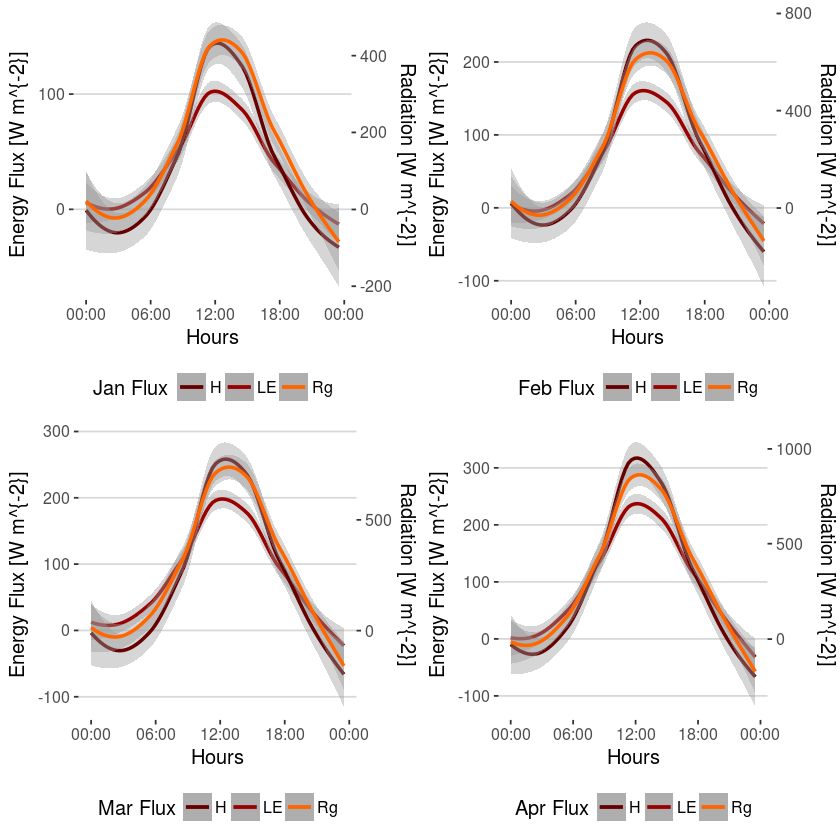

In [13]:
require(scales)
require(ggpubr)
require(gridExtra)
require(ggthemes)


p1 <- ggplot(resJan, aes(x = NHour, group = 1)) + theme_hc() 
  p1 <- p1 + geom_smooth(aes(y = LE, colour = "LE"))
  p1 <- p1 + geom_smooth(aes(y = H, colour = "H"))
  p1 <- p1 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
       
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p1 <- p1 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  p1 <- p1 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p1 <- p1 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Jan Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix")) 
         
#p1

p2 <- ggplot(resFeb, aes(x = NHour, group = 1)) + theme_hc()
  p2 <- p2 + geom_smooth(aes(y = LE, colour = "LE"))
  p2 <- p2 + geom_smooth(aes(y = H, colour = "H"))
  p2 <- p2 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p2 <- p2 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p2 <- p2 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p2 <- p2 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Feb Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p2


p3 <- ggplot(resMar, aes(x = NHour, group = 1)) + theme_hc()
  p3 <- p3 + geom_smooth(aes(y = LE, colour = "LE"))
  p3 <- p3 + geom_smooth(aes(y = H, colour = "H"))
  p3 <- p3 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p3 <- p3 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p3 <- p3 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p3 <- p3 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Mar Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

# p3

p4 <- ggplot(resApr, aes(x = NHour, group = 1)) + theme_hc() 
  p4 <- p4 + geom_smooth(aes(y = LE, colour = "LE"))
  p4 <- p4 + geom_smooth(aes(y = H, colour = "H"))
  p4 <- p4 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p4 <- p4 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p4 <- p4 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p4 <- p4 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Apr Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p4


grid.arrange(p1, p2, p3, p4, nrow = 2)


`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


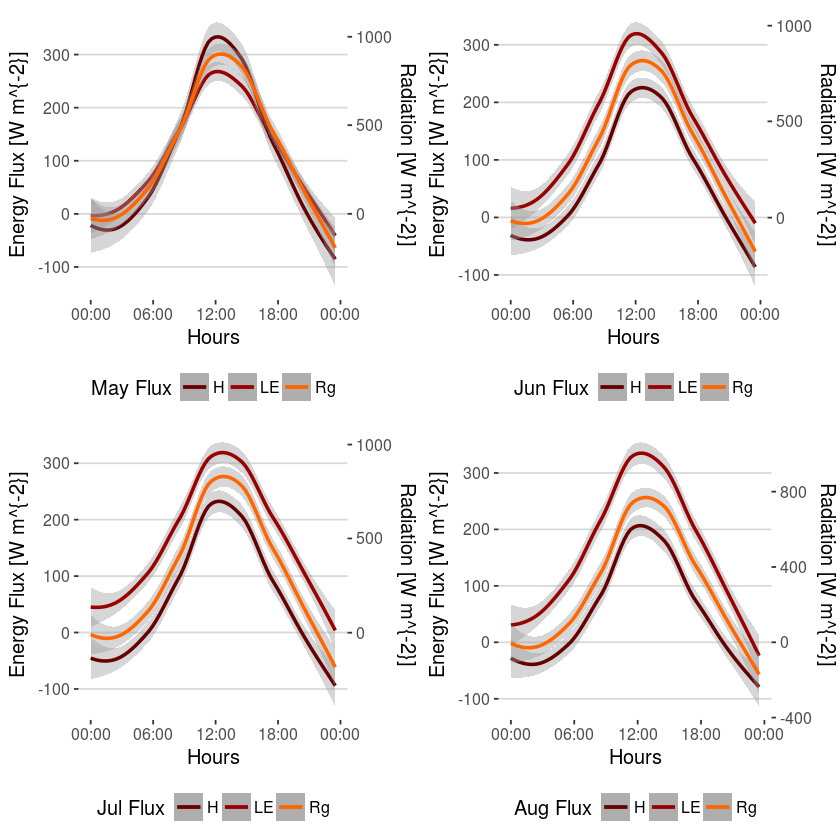

In [14]:
p5 <- ggplot(resMay, aes(x = NHour, group = 1)) + theme_hc()
  p5 <- p5 + geom_smooth(aes(y = LE, colour = "LE"))
  p5 <- p5 + geom_smooth(aes(y = H, colour = "H"))
  p5 <- p5 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p5 <- p5 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p5 <- p5 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p5 <- p5 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "May Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p5

  p6 <- ggplot(resJun, aes(x = NHour, group = 1)) + theme_hc()
  p6 <- p6 + geom_smooth(aes(y = LE, colour = "LE"))
  p6 <- p6 + geom_smooth(aes(y = H, colour = "H"))
  p6 <- p6 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p6 <- p6 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p6 <- p6 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p6 <- p6 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Jun Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p6

  p7 <- ggplot(resJul, aes(x = NHour, group = 1)) + theme_hc()
  p7 <- p7 + geom_smooth(aes(y = LE, colour = "LE"))
  p7 <- p7 + geom_smooth(aes(y = H, colour = "H"))
  p7 <- p7 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p7 <- p7 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p7 <- p7 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p7 <- p7 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Jul Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p7

  p8 <- ggplot(resAug, aes(x = NHour, group = 1)) + theme_hc()
  p8 <- p8 + geom_smooth(aes(y = LE, colour = "LE"))
  p8 <- p8 + geom_smooth(aes(y = H, colour = "H"))
  p8 <- p8 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p8 <- p8 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p8 <- p8 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p8<- p8 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Aug Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p8

grid.arrange(p5, p6, p7, p8, nrow = 2)

`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'
`geom_smooth()` using method = 'loess'


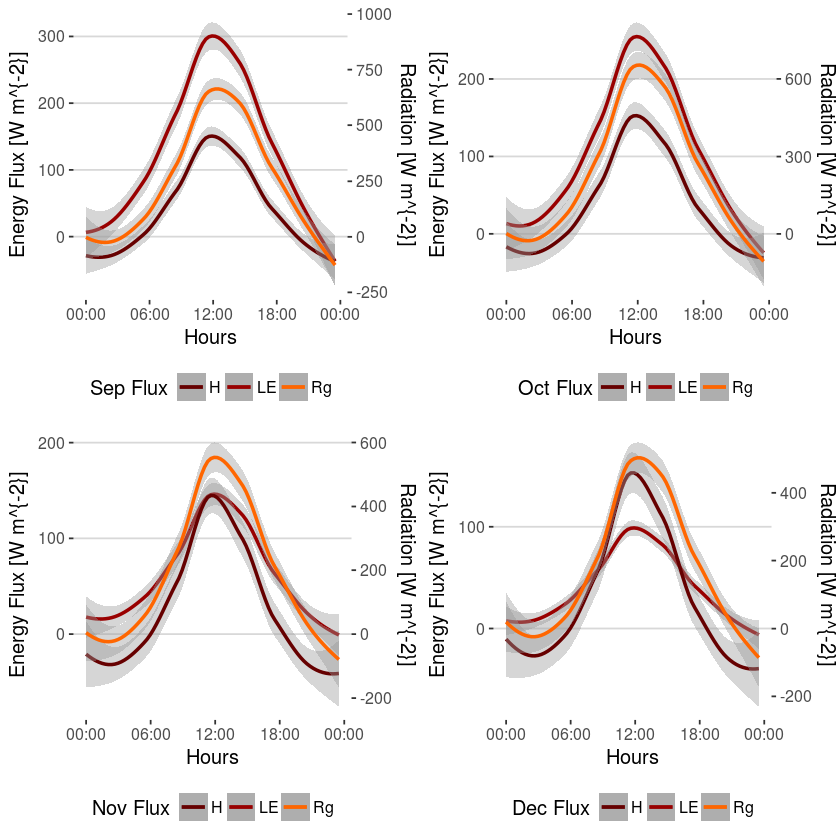

In [15]:
p9 <- ggplot(resSep, aes(x = NHour, group = 1)) + theme_hc()
  p9 <- p9 + geom_smooth(aes(y = LE, colour = "LE"))
  p9 <- p9 + geom_smooth(aes(y = H, colour = "H"))
  p9 <- p9 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p9 <- p9 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p9 <- p9 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p9 <- p9 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Sep Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p9

  p10 <- ggplot(resOct, aes(x = NHour, group = 1)) + theme_hc()
  p10 <- p10 + geom_smooth(aes(y = LE, colour = "LE"))
  p10 <- p10 + geom_smooth(aes(y = H, colour = "H"))
  p10 <- p10 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p10 <- p10 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p10 <- p10 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p10 <- p10 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Oct Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p10

  p11 <- ggplot(resNov, aes(x = NHour, group = 1)) + theme_hc()
  p11 <- p11 + geom_smooth(aes(y = LE, colour = "LE"))
  p11 <- p11 + geom_smooth(aes(y = H, colour = "H"))
  p11 <- p11 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p11 <- p11 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p11 <- p11 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p11 <- p11 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Nov Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p11

  p12 <- ggplot(resDec, aes(x = NHour, group = 1)) + theme_hc()
  p12 <- p12 + geom_smooth(aes(y = LE, colour = "LE"))
  p12 <- p12 + geom_smooth(aes(y = H, colour = "H"))
  p12 <- p12 + geom_smooth(aes(y = Rg/3, colour = "Rg")) 
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p12 <- p12 + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
  # modifying colours and theme options
  p12 <- p12 + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p12 <- p12 + labs(y = "Energy Flux [W m^{-2}]",
                x = "Hours",
                colour = "Dec Flux") +
          scale_x_datetime(labels = date_format("%H:%M", tz = "America/Phoenix"))

#p8

grid.arrange(p9, p10, p11, p12, nrow = 2)

In [16]:
tail(resJan)

,Hour,DoY,Date,LE,H,Rg,NHour,Month
43,21:00,16,2015-01-16 21:00:00,1.4902698,-8.350045,0.00000000,2018-05-21 21:00:00,Jan
44,21:30,16,2015-01-16 21:30:00,0.7239938,-12.283761,0.00000000,2018-05-21 21:30:00,Jan
45,22:00,16,2015-01-16 22:00:00,6.1376975,-15.199194,0.00000000,2018-05-21 22:00:00,Jan
46,22:30,16,2015-01-16 22:30:00,-1.2344856,-12.156087,0.00000000,2018-05-21 22:30:00,Jan
47,23:00,16,2015-01-16 23:00:00,0.1115344,-10.935939,0.00000000,2018-05-21 23:00:00,Jan
48,23:30,16,2015-01-16 23:30:00,3.7986223,-8.445661,0.01064516,2018-05-21 23:30:00,Jan


In [17]:
fullres <- rbind(resJan, resFeb, resMar, resApr, resMay, resJun, resJul, resAug, resSep, resOct, resNov, resDec)
str(fullres)
summary(fullres)

'data.frame':	576 obs. of  8 variables:
 $ Hour : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY  : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ LE   : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H    : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg   : num  0 0.0752 0.0323 0.0213 0 ...
 $ NHour: POSIXct, format: "2018-05-21 00:00:00" "2018-05-21 00:30:00" ...
 $ Month: chr  "Jan" "Jan" "Jan" "Jan" ...


     Hour                DoY              Date                    
 Length:576         Min.   : 16.00   Min.   :2015-01-16 00:00:00  
 Class :character   1st Qu.: 97.88   1st Qu.:2015-04-08 02:52:30  
 Mode  :character   Median :181.75   Median :2015-07-01 05:45:00  
                    Mean   :182.21   Mean   :2015-07-01 16:45:00  
                    3rd Qu.:266.12   3rd Qu.:2015-09-23 20:37:30  
                    Max.   :350.00   Max.   :2015-12-16 23:30:00  
       LE               H                Rg          
 Min.   :-12.10   Min.   :-57.17   Min.   :  0.0000  
 1st Qu.: 14.07   1st Qu.:-22.61   1st Qu.:  0.0213  
 Median : 48.64   Median :-11.54   Median : 11.3730  
 Mean   : 94.55   Mean   : 52.75   Mean   :239.5136  
 3rd Qu.:162.63   3rd Qu.:130.82   3rd Qu.:510.5666  
 Max.   :349.31   Max.   :382.37   Max.   :972.9355  
     NHour                        Month          
 Min.   :2018-05-21 00:00:00   Length:576        
 1st Qu.:2018-05-21 05:52:30   Class :character  
 Me

In [450]:
months <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")
months = factor(months,levels=c("Jan","Feb","Mar",
              "Apr","May","Jun","Jul","Aug","Sep",
              "Oct","Nov","Dec"),ordered=TRUE)
str(months)

 Ord.factor w/ 12 levels "Jan"<"Feb"<"Mar"<..: 1 2 3 4 5 6 7 8 9 10 ...


In [22]:
require(dplyr) # or library("tidyverse")
#fullres <- fullres %>% mutate(id = row_number())
fullres$ID <- seq.int(nrow(fullres))
head(fullres)
str(fullres)

Hour,DoY,Date,LE,H,Rg,NHour,Month,ID
00:00,16,2015-01-16 00:00:00,1.455789,-5.557045,0.00000000,2018-05-21 00:00:00,Jan,1
00:30,16,2015-01-16 00:30:00,4.130209,-10.105342,0.07516129,2018-05-21 00:30:00,Jan,2
01:00,16,2015-01-16 01:00:00,3.813279,-12.952048,0.03225806,2018-05-21 01:00:00,Jan,3
01:30,16,2015-01-16 01:30:00,10.912977,-22.061581,0.02129032,2018-05-21 01:30:00,Jan,4
02:00,16,2015-01-16 02:00:00,2.010547,-12.025410,0.00000000,2018-05-21 02:00:00,Jan,5
02:30,16,2015-01-16 02:30:00,12.666134,-10.632858,0.01064516,2018-05-21 02:30:00,Jan,6


'data.frame':	576 obs. of  9 variables:
 $ Hour : chr  "00:00" "00:30" "01:00" "01:30" ...
 $ DoY  : num  16 16 16 16 16 16 16 16 16 16 ...
 $ Date : POSIXct, format: "2015-01-16 00:00:00" "2015-01-16 00:30:00" ...
 $ LE   : num  1.46 4.13 3.81 10.91 2.01 ...
 $ H    : num  -5.56 -10.11 -12.95 -22.06 -12.03 ...
 $ Rg   : num  0 0.0752 0.0323 0.0213 0 ...
 $ NHour: POSIXct, format: "2018-05-21 00:00:00" "2018-05-21 00:30:00" ...
 $ Month: chr  "Jan" "Jan" "Jan" "Jan" ...
 $ ID   : int  1 2 3 4 5 6 7 8 9 10 ...


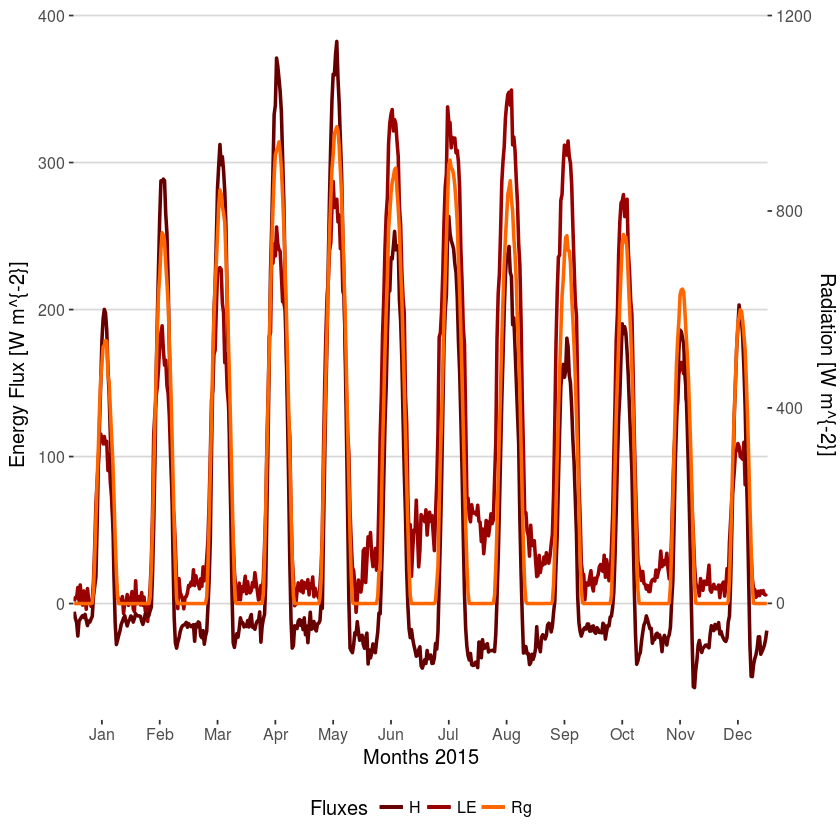

In [53]:

p <- ggplot(fullres, aes(x=factor(ID),group = 1)) + theme_hc() 
  p <- p + geom_line(aes(y = LE, colour = "LE"), size=1)
  p <- p + geom_line(aes(y = H, colour = "H"), size=1)
  p <- p + geom_line(aes(y = Rg/3, colour = "Rg"), size=1) 
       
  
  # now adding the secondary axis, following the example in the help file ?scale_y_continuous
  # and, very important, reverting the above transformation
  p <- p + scale_y_continuous(sec.axis = sec_axis(~.*3, name = "Radiation [W m^{-2}]"))
 
  # modifying colours and theme options
  p <- p + scale_colour_manual(values = c("#660000", "#990000", "#FF6600"))
  p <- p + labs(y = "Energy Flux [W m^{-2}]", x = "Months 2015", colour = "Fluxes") +
       scale_x_discrete(breaks=c(24,72,120,168,216,264, 312, 360, 408, 456,504,552), 
                        labels=c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")) 
                     #   xlab("Months 2015") + ylab("Energy Fluxes [W m^{-2}]")
      #  scale_x_datetime(date_format("%Y-%m-%d", tz = "America/Phoenix")) + theme_hc()
         
p

In [433]:
head(fullres)
tail(fullres)

Hour,DoY,Date,LE,H,Rg,NHour
00:00,16,2015-01-16 00:00:00,1.455789,-5.557045,0.00000000,2018-05-20 00:00:00
00:30,16,2015-01-16 00:30:00,4.130209,-10.105342,0.07516129,2018-05-20 00:30:00
01:00,16,2015-01-16 01:00:00,3.813279,-12.952048,0.03225806,2018-05-20 01:00:00
01:30,16,2015-01-16 01:30:00,10.912977,-22.061581,0.02129032,2018-05-20 01:30:00
02:00,16,2015-01-16 02:00:00,2.010547,-12.025410,0.00000000,2018-05-20 02:00:00
02:30,16,2015-01-16 02:30:00,12.666134,-10.632858,0.01064516,2018-05-20 02:30:00


,Hour,DoY,Date,LE,H,Rg,NHour
571,21:00,350,2015-12-16 21:00:00,8.656033,-34.47161,0.00000000,2018-05-20 21:00:00
572,21:30,350,2015-12-16 21:30:00,7.100950,-32.69640,0.04290323,2018-05-20 21:30:00
573,22:00,350,2015-12-16 22:00:00,8.837094,-30.71897,0.03225806,2018-05-20 22:00:00
574,22:30,350,2015-12-16 22:30:00,6.168810,-28.31871,0.07548387,2018-05-20 22:30:00
575,23:00,350,2015-12-16 23:00:00,5.845917,-24.40964,0.01064516,2018-05-20 23:00:00
576,23:30,350,2015-12-16 23:30:00,6.676820,-18.38593,0.02161290,2018-05-20 23:30:00


In [136]:
# date (X), time (X.1), DOY (X.2) 
# Flujos: co2_flux (X.11), ch4_flux (X.15)
# Mixing ratios: co2_mixing_ratio (X.24), ch4_mixing_ratio (X.34)
# Time lags: co2_time_lag (X.25), ch4_time_lag (X.35)
# RH (X.47)
# u* (turbulence)
# La velocidad del viento y dirección: wind_speed (X.54), wind_dir (X.56)
# Convertir columnas a numérico
require(dplyr)
# Select date, time, DOY, co2_flux, ch4_flux, co2_mixing_ratio, co2_time_lag, 
#        ch4_mixing_ratio, ch4_time_lag, wind_speed, wind_dir 
#             

#df_corral1 <- subset(df_dist1, select=c("X", "X.1", "X.2", "X.11", "X.15", "X.24", "X.25", 
#                                      "X.34", "X.35", "X.54", "X.56", "turbulence" ))

#df_corral1 <- subset(df_dist1, select=c("date", "time", "DOY", "co2_flux", "ch4_flux", 
#                                        "co2_mixing_ratio", "co2_time_lag", 
#                                      "ch4_mixing_ratio", "ch4_time_lag", "wind_speed", "wind_dir", "u." ))
#names(df_corral1) <- c("date", "hours", "DOY", "co2_flux", "ch4_flux", 
#                      "co2_mixing_ratio", "co2_time_lag", "ch4_mixing_ratio", "ch4_time_lag", 
#                      "spd", "dir", "u_star")
# Keep only full data (Eliminate NAs)
df_corral1 <- df_corral1[complete.cases(df_corral1), ]
df_corral2 <- df_corral2[complete.cases(df_corral2), ]
# Create Date, combining date + hours
#df_corral1$Date <- as.POSIXct(paste(df_corral1$date, df_corral1$hours), format="%Y-%m-%d %H:%M")
# Convert to numeric rest of columns that were char type
#df_corral1[,4:12] <- sapply(df_corral1[,4:12], as.numeric)
#sapply(df_corral, class)




In [137]:
str(df_corral1)
summary(df_corral1)
str(df_corral2)
summary(df_corral2)

'data.frame':	18000 obs. of  3 variables:
 $ Time               : POSIXct, format: "2018-01-26 09:00:00.0" "2018-01-26 09:00:00.0" ...
 $ Concentracion_CH4  : num  2.17 2.16 2.16 2.16 2.17 ...
 $ Intensidad_de_Señal: num  14.7 14.7 14.6 15.8 15.6 ...


      Time                        Concentracion_CH4 Intensidad_de_Señal
 Min.   :2018-01-26 09:00:00.00   Min.   :2.057     Min.   :13.38      
 1st Qu.:2018-01-26 09:07:29.98   1st Qu.:2.081     1st Qu.:16.40      
 Median :2018-01-26 09:14:59.95   Median :2.094     Median :16.45      
 Mean   :2018-01-26 09:14:59.95   Mean   :2.107     Mean   :16.42      
 3rd Qu.:2018-01-26 09:22:29.93   3rd Qu.:2.145     3rd Qu.:16.49      
 Max.   :2018-01-26 09:29:59.90   Max.   :2.186     Max.   :18.07      

'data.frame':	18000 obs. of  3 variables:
 $ Time               : POSIXct, format: "2018-01-26 09:30:00.0" "2018-01-26 09:30:00.0" ...
 $ Concentracion_CH4  : num  2.08 2.07 2.08 2.07 2.07 ...
 $ Intensidad_de_Señal: num  15.9 15.9 16.4 15.2 15.5 ...


      Time                        Concentracion_CH4 Intensidad_de_Señal
 Min.   :2018-01-26 09:30:00.00   Min.   :2.031     Min.   : 0.1425    
 1st Qu.:2018-01-26 09:37:29.95   1st Qu.:2.103     1st Qu.:13.0649    
 Median :2018-01-26 09:44:59.90   Median :2.158     Median :13.2257    
 Mean   :2018-01-26 09:44:59.85   Mean   :2.433     Mean   :13.4679    
 3rd Qu.:2018-01-26 09:52:29.84   3rd Qu.:2.521     3rd Qu.:13.7146    
 Max.   :2018-01-26 09:59:59.90   Max.   :7.844     Max.   :17.0043    

In [5]:
# Eliminate missing numbers -9999
#df_corral1[df_corral1 < -5000] <- NA
#df_corral1 <- df_corral1[complete.cases(df_corral1), ]
#summary(df_corral1)


     date              hours               DOY               co2_flux      
 Length:889         Length:889         Length:889         Min.   :-43.940  
 Class :character   Class :character   Class :character   1st Qu.:  0.140  
 Mode  :character   Mode  :character   Mode  :character   Median :  2.840  
                                                          Mean   :  5.436  
                                                          3rd Qu.:  6.800  
                                                          Max.   : 66.100  
    ch4_flux       co2_mixing_ratio  co2_time_lag    ch4_mixing_ratio
 Min.   :-2.5400   Min.   :375.5    Min.   :0.1000   Min.   :1.936   
 1st Qu.: 0.0000   1st Qu.:397.2    1st Qu.:0.2000   1st Qu.:1.978   
 Median : 0.0700   Median :398.1    Median :0.3000   Median :2.002   
 Mean   : 0.3007   Mean   :399.2    Mean   :0.2525   Mean   :2.087   
 3rd Qu.: 0.2800   3rd Qu.:400.4    3rd Qu.:0.3000   3rd Qu.:2.043   
 Max.   : 8.0100   Max.   :464.6    Max.   :0.50

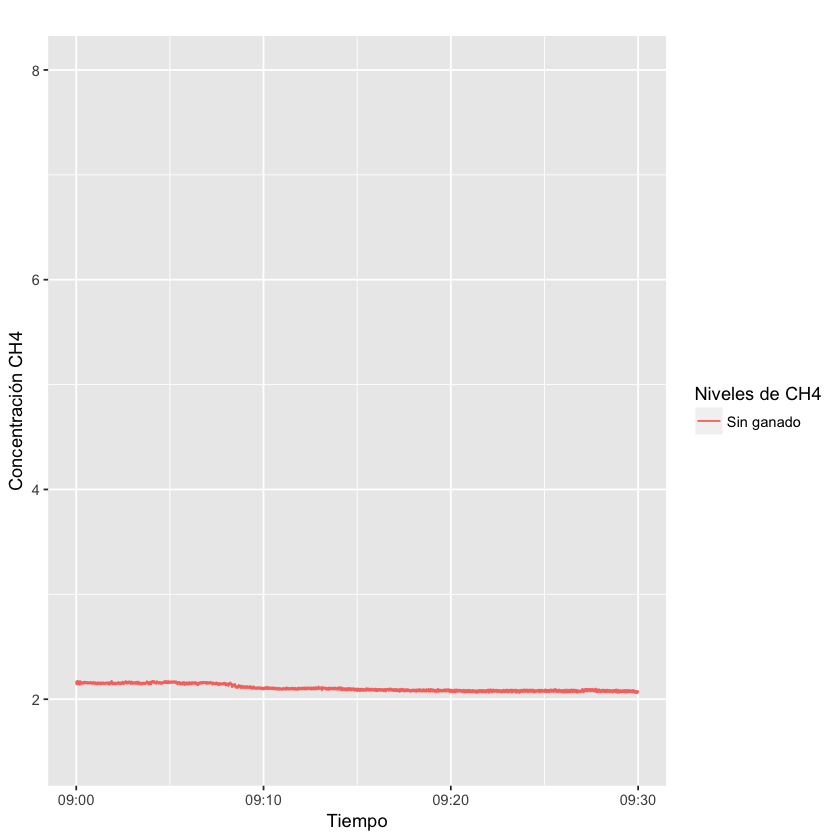

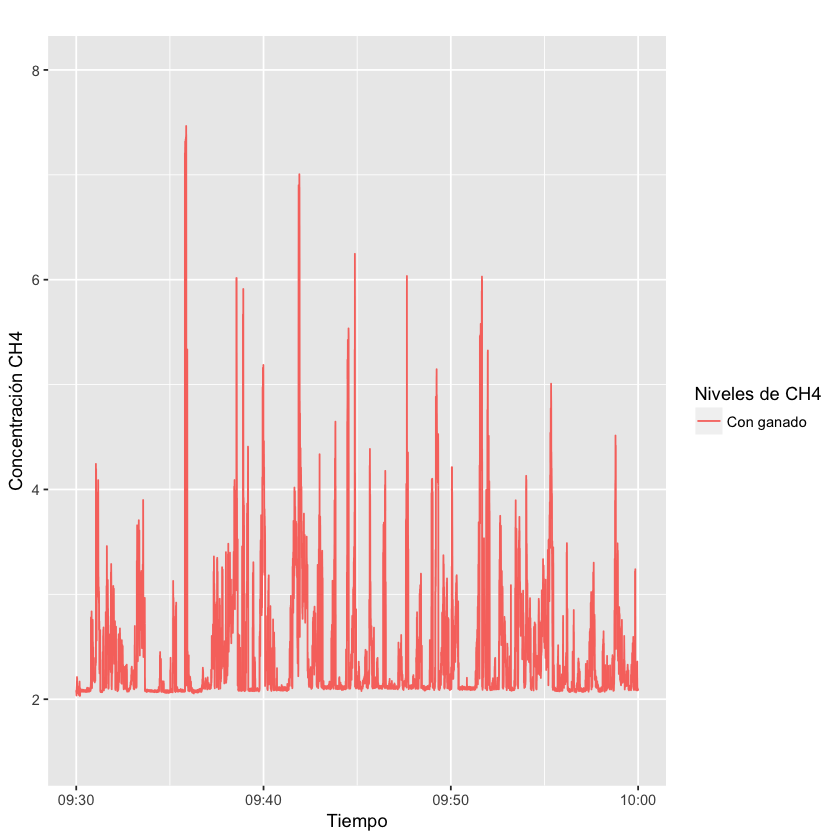

In [140]:
require(ggplot2)
p1 <- ggplot(df_corral1, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Sin ganado" ) ) + geom_line() + 
      labs(title = "", x = "Tiempo", y= "Concentración CH4") + guides(color=guide_legend("Niveles de CH4")) +
      ylim(1.5, 8.0)
print(p1)
p2 <- ggplot(df_corral2, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Con ganado") ) + geom_line() +
      labs(title = "", x = "Tiempo", y= "Concentración CH4") + guides(color=guide_legend("Niveles de CH4")) +
      ylim(1.5, 8.0)
print(p2)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


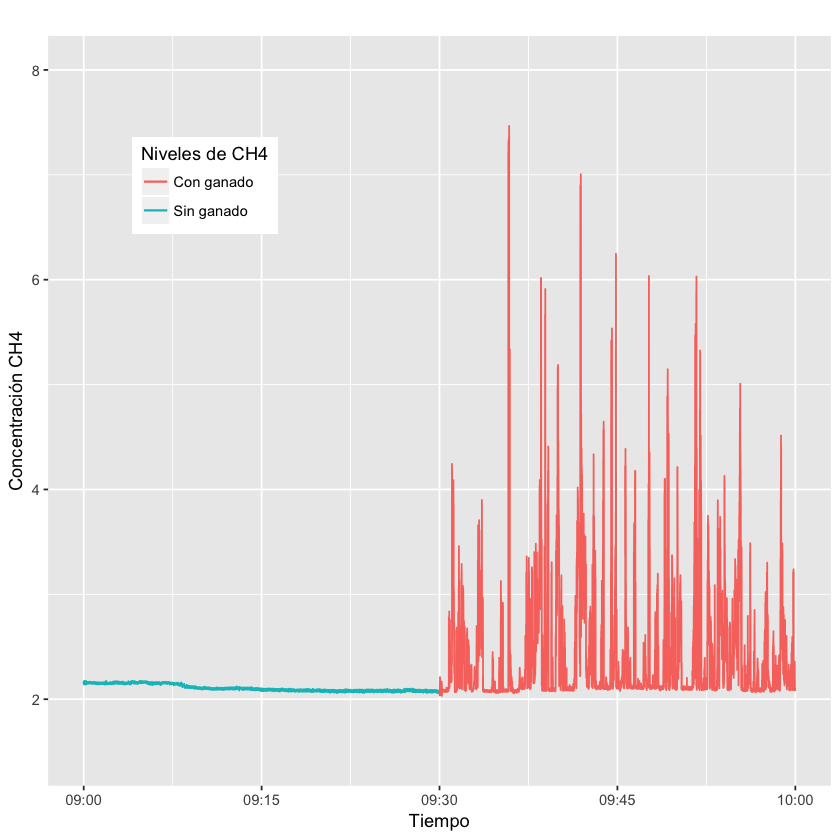

In [128]:
require(dplyr)
require(oce)

df_corral_period_1 <- subset(df_corral1, Time > "2018-01-26 09:00:00.00" & Time < "2018-01-26 09:29:59.90")
df_corral_period_2 <- subset(df_corral2, Time > "2018-01-26 09:30:00.00" & Time < "2018-01-26 09:59:59.90")


p <- ggplot(df_corral_period_1, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Sin ganado" )) + 
            geom_line() + ylim(1.5, 8.0) + 
            labs(title = "", x = "Tiempo", y= "Concentración CH4") +
            guides(color=guide_legend("Niveles de CH4"))
p <- p + geom_line(data=df_corral_period_2, aes(Time, despike(Concentracion_CH4, reference="smooth"), color="Con ganado")) +
      theme(legend.position = c(0.2, 0.8)) + ylim(1.5, 8.0)

print(p)


#q <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="Ganado comiendo" )) + 
#            geom_line() + ylim(1.5, 5.0) + 
#            labs(title = "Serie de tiempo de niveles de CH4", x = "Time", y= "Flujo CH4") +
#            guides(color=guide_legend("Niveles de CH4"))
#q <- q + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_flux, reference="smooth"), color="Nivel de referencia base"))

#print(q)


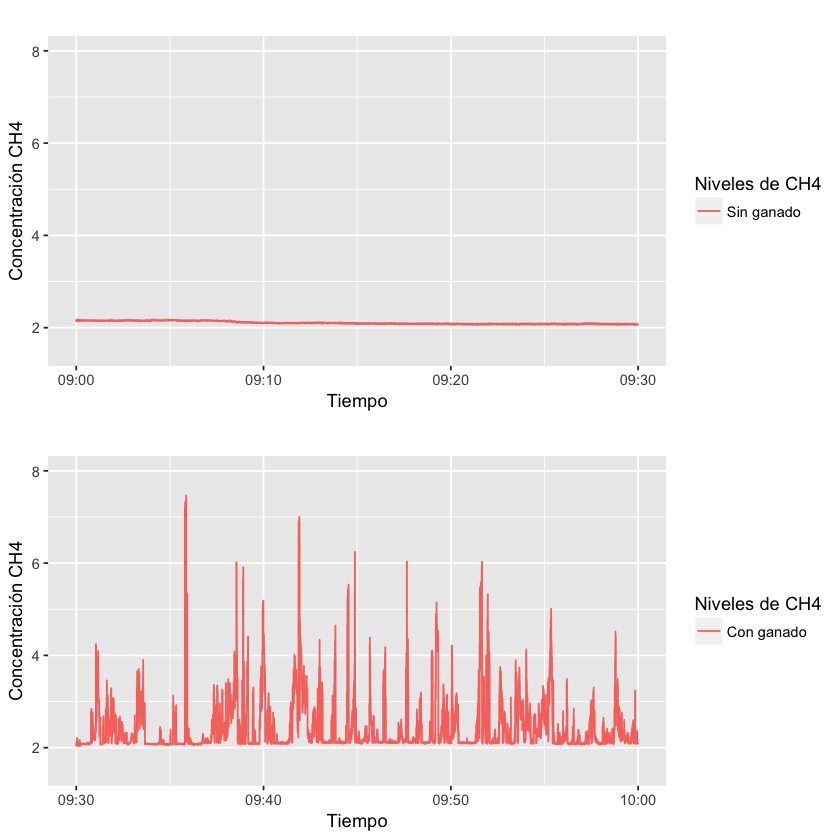

In [129]:
library(gridExtra)
grid.arrange(p1, p2, nrow = 2)

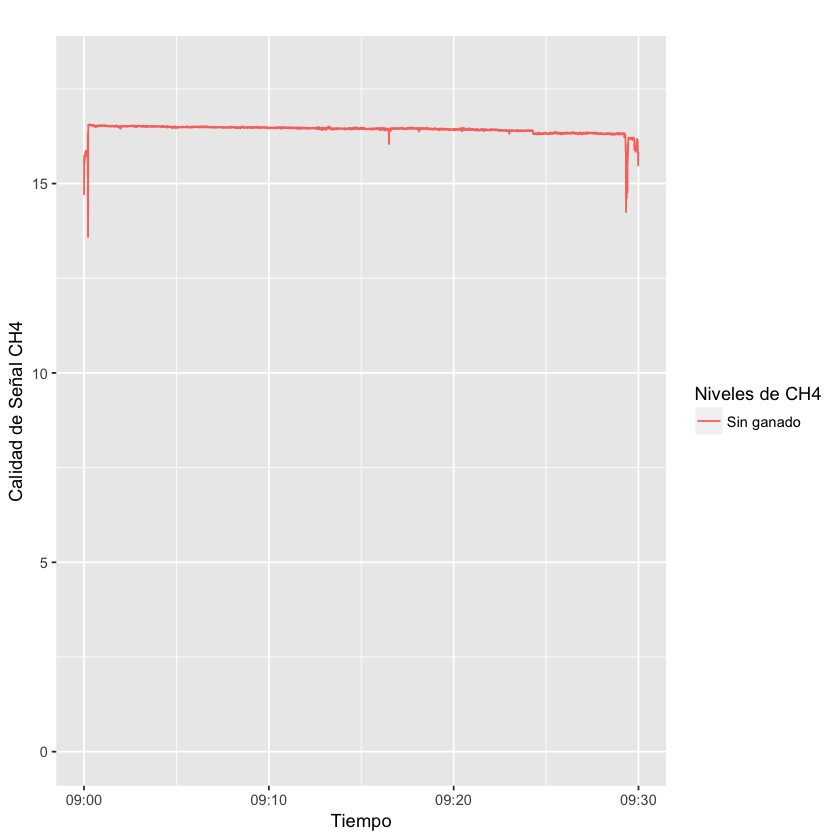

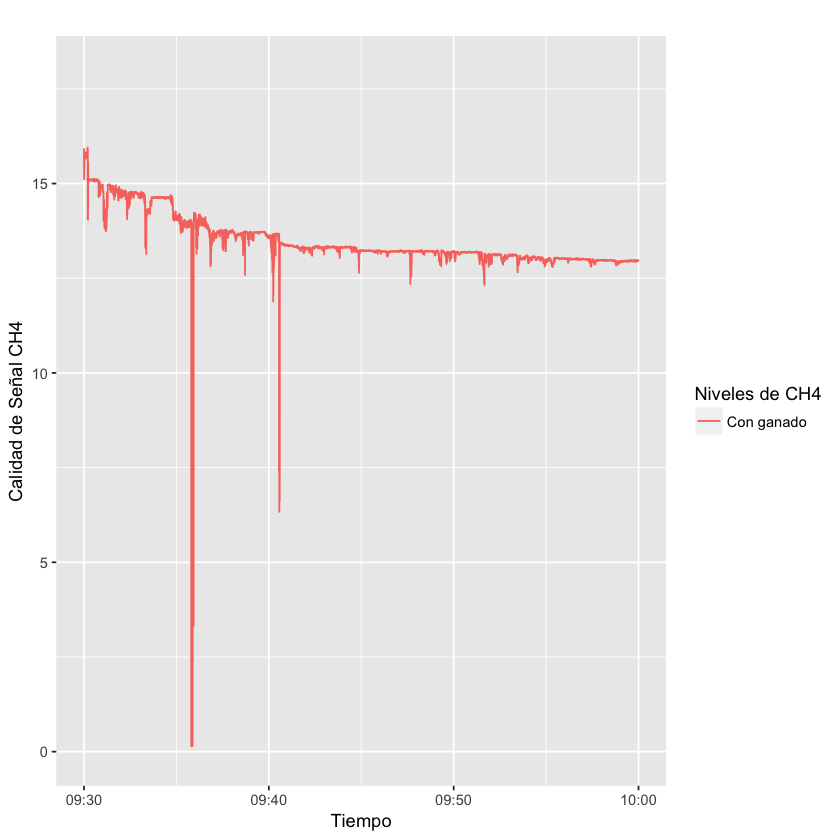

In [142]:
# Signal strength
require(ggplot2)
p1 <- ggplot(df_corral1, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Sin ganado" ) ) + geom_line() + 
      labs(title = "", x = "Tiempo", y= "Calidad de Señal CH4") + guides(color=guide_legend("Niveles de CH4")) +
      ylim(0.0, 18.0)
print(p1)
p2 <- ggplot(df_corral2, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Con ganado") ) + geom_line() +
      labs(title = "", x = "Tiempo", y= "Calidad de Señal CH4") + guides(color=guide_legend("Niveles de CH4")) +
      ylim(0.0, 18.0)
print(p2)

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


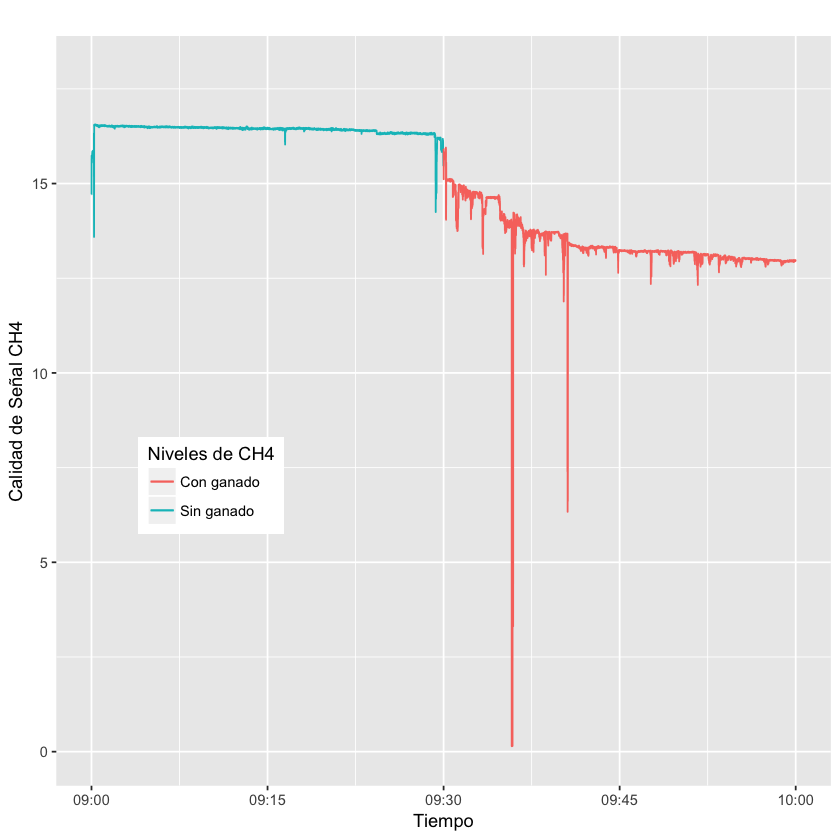

In [145]:
require(dplyr)
require(oce)

df_corral_period_1 <- subset(df_corral1, Time > "2018-01-26 09:00:00.00" & Time < "2018-01-26 09:29:59.90")
df_corral_period_2 <- subset(df_corral2, Time > "2018-01-26 09:30:00.00" & Time < "2018-01-26 09:59:59.90")


p <- ggplot(df_corral_period_1, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Sin ganado" )) + 
            geom_line() + ylim(0.0, 18.0) + 
            labs(title = "", x = "Tiempo", y= "Calidad de Señal CH4") +
            guides(color=guide_legend("Niveles de CH4"))
p <- p + geom_line(data=df_corral_period_2, aes(Time, despike(Intensidad_de_Señal, reference="smooth"), color="Con ganado")) +
      theme(legend.position = c(0.2, 0.4)) + ylim(0.0, 18.0)

print(p)



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [ ]:
# Old stuff
require(dplyr)
require(oce)

df_corral_period <- subset(df_corral1, Date > "2017-12-04 18:00" & Date < "2017-12-05 00:00")
df_corral_period_ref <- subset(df_corral1, Date > "2017-12-04 12:00" & Date < "2017-12-04 18:00")

p <- ggplot(df_corral_period, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="orange")) + geom_line()
p <- p + geom_line(df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio), color="")) + 
        labs(title = "CH4 time series",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked"))
print(p)

#q <- ggplot(df_corral_period, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="blue")) + 
#     geom_line(df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio), color="orange")) + 
#     ylim(1.5, 7.5)
#q <- q + labs(title = "CH4 time series",
#           x = "Time", y= "CH4 mixing ratio") +
#           guides(color=guide_legend("Despiked - smooth")) + ylim(1.5, 4.5)
#print(q)



In [ ]:
require(oce)
df_corral_period <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-05 00:00")
df_corral_period_ref <- subset(df_corral1, Date > "2017-12-04 12:00" & Date < "2017-12-04 18:00")

p <- ggplot(df_corral_period, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="Ganado comiendo" )) + 
            geom_line() + ylim(1.5, 5.0) + 
            labs(title = "Serie de tiempo de niveles de CH4", x = "Tiempo", y= "tasa de mezclado CH4 (\xe5\xb5mol+1mol_d-1)") +
            guides(color=guide_legend("Niveles de CH4"))
p <- p + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="Referencia base"))

print(p)


q <- ggplot(df_corral_period, aes(Date, despike(ch4_flux, reference="smooth"), color="Ganado comiendo" )) + 
            geom_line() + ylim(1.5, 5.0) + 
            labs(title = "Serie de tiempo de niveles de CH4", x = "Time", y= "Flujo CH4") +
            guides(color=guide_legend("Niveles de CH4"))
q <- q + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_flux, reference="smooth"), color="Nivel de referencia base"))

print(q)



In [ ]:
# Old stuff
df_corral_period_ref <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 19:00")


p <- ggplot(df_corral_period_ref, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_ref, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_ref, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)



In [ ]:
df_corral_period_peak <- subset(df_corral1, Date> "2017-12-04 21:00" & Date < "2017-12-04 22:00")

p <- ggplot(df_corral_period_peak, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 7.5)
p <- p + geom_line(data=df_corral_period_peak, aes(Date, despike(ch4_mixing_ratio), color="orange")) +
           labs(title = "CH4 time series",
           x = "Time", y= "CH4 mixing ratio - near peak") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_peak, aes(Date, ch4_mixing_ratio) ) + geom_line() + ylim(1.5, 7.5)
q <- q + geom_line(data=df_corral_period_peak, aes(Date, despike(ch4_mixing_ratio, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series near peak",
           x = "Time", y= "CH4 mixing ratio") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)



In [ ]:
names(df_corral1)

In [ ]:
# ch4 flux vs time lag (Full range)
df_corral_period <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 22:00")


p <- ggplot(df_corral_period, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period, aes(ch4_time_lag, despike(ch4_flux), color="orange")) +
           labs(title = "CH4 time series - full range",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_ref, aes(ch4_time_lag, despike(ch4_flux, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - full tange",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)




In [ ]:
# ch4 flux vs time lag (Background Values)
df_corral_period_ref <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 19:00")


p <- ggplot(df_corral_period_ref, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period_ref, aes(ch4_time_lag, despike(ch4_flux), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_ref, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_ref, aes(ch4_time_lag, despike(ch4_flux, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - backgound value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)



In [ ]:
# ch4 flux vs time lag (Near peak Values)
df_corral_period_peak <- subset(df_corral1, Date> "2017-12-04 21:00" & Date < "2017-12-04 22:00")


p <- ggplot(df_corral_period_peak, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
p <- p + geom_line(data=df_corral_period_peak, aes(ch4_time_lag, despike(ch4_flux), color="orange")) +
           labs(title = "CH4 time series - near peak value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked"))
print(p)

q <- ggplot(df_corral_period_peak, aes(ch4_time_lag, ch4_flux) ) + geom_line() # + ylim(1.5, 2.5)
q <- q + geom_line(data=df_corral_period_peak, aes(ch4_time_lag, despike(ch4_flux, reference="smooth"), color="orange")) +
           labs(title = "CH4 time series - near peak value",
           x = "CH4 Time Lag (s)", y= "CH4 flux") +
           guides(color=guide_legend("Despiked - smooth"))
print(q)




In [ ]:
# co2 & ch4 fluxes, u*
# 
require(oce)
df_corral_period <- subset(df_corral1, Date> "2017-12-04 18:00" & Date < "2017-12-04 22:00")

p <- ggplot(df_corral_period, aes(x = Date))
p <- p + geom_line(aes(y = despike(co2_flux, reference="smooth"), colour="CO2 Flux")) 
p <- p + geom_line(aes(y = despike(ch4_flux, reference="smooth"), colour="CH4 Flux"))
p
p <- p + geom_line(aes(y = 10.0*u_star, colour="u star"))
p <- p + scale_y_continuous(sec.axis = sec_axis(~.*5, name = "10 * u star [m/s]")) 
p <- p + scale_colour_manual(values = c("brown1", "cyan3", "forestgreen"))
p <- p + labs(y="Fluxes", x="date", colour="Parameter")
p <- p + theme(legend.position = c(0.8, 0.9))
p


In [ ]:
ggplot(df_corral_period, aes(co2_flux, ch4_flux)) + geom_point()

In [ ]:
p <- ggplot(df_corral_period, aes(x = co2_flux, y = ch4_flux)) + geom_point()
p + stat_smooth(method = "gam", formula = y ~ s(x, k = 3), size = 1, colour = "violet") +
ggtitle("Correlación CO2-CH4 modelo GAM")
cor(df_corral_period$co2_flux, df_corral_period$ch4_flux, na.rm=TRUE)

In [ ]:
# OLD Stuff
# La velocidad del viento, vel max y dirección estan en columnas X, X.1, X.2
# Convertir columnas a numérico
require(dplyr)
df_Wind <- subset(df_dist, select=c("date", "time", "wind_speed", "wind_dir"))
names(df_Wind) <- c("date", "hours", "spd", "dir")
df_Wind <- df_Wind[complete.cases(df_Wind), ]
#df_Wind[] <- lapply(df_Wind, as.numeric)
df_Wind$Date <- as.POSIXct(paste(df_Wind$date, df_Wind$hours), format="%Y-%m-%d %H:%M")
#df_Wind$time <- with(df_Wind, as.POSIXct(paste(date, hours)))
df_Wind$spd <- as.numeric(df_Wind$spd)
df_Wind$dir <- as.numeric(df_Wind$dir)
head(df_Wind)

In [ ]:
head(df_Wind)
str(df_Wind)

In [ ]:
# Definiendo la fecha a partir del 2017-01-01
# today<-as.POSIXct('2017-11-05 00:00:00 EST')
# Conversión a segundos: Inicio + DOY*86400 + Hour*3600
# df_Wind$Date <- today + (df_Wind$DOY-1.0)*86400 

In [ ]:
data <- df_Wind
head(data)
str(data)

In [ ]:
require(ggplot2)
require(RColorBrewer)

In [ ]:
plot.windrose <- function(data,
                      spd,
                      dir,
                      spdres = 0.5,
                      dirres = 30,
                      spdmin = 1,
                      spdmax = 20,
                      spdseq = NULL,
                      palette = "RdPu",
                      countmax = NA,
                      debug = 0){


# Look to see what data was passed in to the function
  if (is.numeric(spd) & is.numeric(dir)){
    # assume that we've been given vectors of the speed and direction vectors
    data <- data.frame(spd = spd,
                       dir = dir)
    spd = "spd"
    dir = "dir"
  } else if (exists("data")){
    # Assume that we've been given a data frame, and the name of the speed 
    # and direction columns. This is the format we want for later use.    
  }  

  # Tidy up input data ----
  n.in <- NROW(data)
  dnu <- (is.na(data[[spd]]) | is.na(data[[dir]]))
  data[[spd]][dnu] <- NA
  data[[dir]][dnu] <- NA

  # figure out the wind speed bins ----
  if (missing(spdseq)){
    spdseq <- seq(spdmin,spdmax,spdres)
  } else {
    if (debug >0){
      cat("Using custom speed bins \n")
    }
  }
  # get some information about the number of bins, etc.
  n.spd.seq <- length(spdseq)
  n.colors.in.range <- n.spd.seq - 1

  # create the color map
  spd.colors <- colorRampPalette(brewer.pal(min(max(3,
                                                    n.colors.in.range),
                                                min(9,
                                                    n.colors.in.range)),                                               
                                            palette))(n.colors.in.range)

  if (max(data[[spd]],na.rm = TRUE) > spdmax){    
    spd.breaks <- c(spdseq,
                    max(data[[spd]],na.rm = TRUE))
    spd.labels <- c(paste(c(spdseq[1:n.spd.seq-1]),
                          '-',
                          c(spdseq[2:n.spd.seq])),
                    paste(spdmax,
                          "-",
                          max(data[[spd]],na.rm = TRUE)))
    spd.colors <- c(spd.colors, "grey50")
  } else{
    spd.breaks <- spdseq
    spd.labels <- paste(c(spdseq[1:n.spd.seq-1]),
                        '-',
                        c(spdseq[2:n.spd.seq]))    
  }
  data$spd.binned <- cut(x = data[[spd]],
                         breaks = spd.breaks,
                         labels = spd.labels,
                         ordered_result = TRUE)
  # clean up the data
  data. <- na.omit(data)

  # figure out the wind direction bins
  dir.breaks <- c(-dirres/2,
                  seq(dirres/2, 360-dirres/2, by = dirres),
                  360+dirres/2)  
  dir.labels <- c(paste(360-dirres/2,"-",dirres/2),
                  paste(seq(dirres/2, 360-3*dirres/2, by = dirres),
                        "-",
                        seq(3*dirres/2, 360-dirres/2, by = dirres)),
                  paste(360-dirres/2,"-",dirres/2))
  # assign each wind direction to a bin
  dir.binned <- cut(data[[dir]],
                    breaks = dir.breaks,
                    ordered_result = TRUE)
  levels(dir.binned) <- dir.labels
  data$dir.binned <- dir.binned

  # Run debug if required ----
  if (debug>0){    
    cat(dir.breaks,"\n")
    cat(dir.labels,"\n")
    cat(levels(dir.binned),"\n")       
  }  

  # deal with change in ordering introduced somewhere around version 2.2
  if(packageVersion("ggplot2") > "2.2"){    
    cat("Hadley broke my code\n")
    data$spd.binned = with(data, factor(spd.binned, levels = rev(levels(spd.binned))))
    spd.colors = rev(spd.colors)
  }

  # create the plot ----
  p.windrose <- ggplot(data = data,
                       aes(x = dir.binned,
                           fill = spd.binned)) +
    geom_bar() + 
    scale_x_discrete(drop = FALSE,
                     labels = waiver()) +
    coord_polar(start = -((dirres/2)/360) * 2*pi) +
    scale_fill_manual(name = "Velocidad (m/s)", 
                      values = spd.colors,
                      drop = FALSE) +
    #theme_bw() +
    theme(axis.title.x = element_blank(),
          #panel.border = element_rect(colour = "blank"),
          panel.grid.major = element_line(colour="grey65"))

  # adjust axes if required
  if (!is.na(countmax)){
    p.windrose <- p.windrose +
      ylim(c(0,countmax))
  }

  # print the plot
  print(p.windrose)  

  # return the handle to the wind rose
  return(p.windrose)
}


In [ ]:
# try the default settings
p1 <- plot.windrose(spd = df_Wind$spd,
                   dir = df_Wind$dir)

In [ ]:
p2 <- plot.windrose(data=df_Wind, spd = df_Wind$spd,
                   dir = df_Wind$dir,
#                   spdseq = c(0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6)) +
                     spdseq = c(0,1,2,3,4,5,6)) +
                   ggtitle("Vientos - Metano en Corrales") +
                   ylab("Frecuencia") # for the main title
p2

In [ ]:
# Mixing ratios
require(dplyr)
df_gases <- subset(df_dist, select=c("date", "time", "co2_flux", "co2_mixing_ratio", 
                                        "co2_time_lag", "ch4_flux", "ch4_mixing_ratio", 
                                        "ch4_time_lag"))
names(df_gases) <- c("date", "hours", "co2flux", "co2mix", "co2tlag", "ch4flux", "ch4mix", "ch4tlag")
df_gases <- df_gases[complete.cases(df_gases), ]
#df_Wind[] <- lapply(df_Wind, as.numeric)
df_gases$Date <- as.POSIXct(paste(df_gases$date, df_gases$hours), format="%Y-%m-%d %H:%M")
#df_Wind$time <- with(df_Wind, as.POSIXct(paste(date, hours)))
df_gases$co2flux <- as.numeric(df_gases$co2flux)
df_gases$co2mix <- as.numeric(df_gases$co2mix)
df_gases$co2tlag <- as.numeric(df_gases$co2tlag)
df_gases$ch4flux <- as.numeric(df_gases$ch4flux)
df_gases$ch4mix <- as.numeric(df_gases$ch4mix)
df_gases$ch4tlag <- as.numeric(df_gases$ch4tlag)
head(df_gases)

In [ ]:
#ggplot(df_gases, aes(Date, ch4flux)) + xlab("Time") + ylab("CH4 flux")
ggplot() + # geom_line(data=df_gases, aes(x=Date, y=co2flux), color="brown", na.rm=TRUE) +
            geom_point(data=df_gases, aes(x=Date, y=ch4flux), color="brown", na.rm=TRUE) +
           ggtitle("CH4 Flux") +
           xlab("Date") + ylab("Flux")

In [ ]:
ggplot(df_gases, aes(co2flux, ch4flux)) +
           geom_point(na.rm=TRUE, color="blue", size=1) + 
           ggtitle("CO2/CH4 Flux") +
           xlab("CO2 Flux") + ylab("CH4 Flux")

In [ ]:
# Opción 
# Calcular Vientos diurnos
# 
#require(dplyr)
#require(lubridate)
#result <- with( df_Wind , df_Wind[ hour(df_Wind$Date) >= 6 & hour(df_Wind$Date) < 18 , ])
#head(result)

In [ ]:
data <- result
head(data)
str(data)

In [ ]:
plot.windrose <- function(data,
                      spd,
                      dir,
                      spdres = 1,
                      dirres = 30,
                      spdmin = 1,
                      spdmax = 20,
                      spdseq = NULL,
                      palette = "RdPu",
                      countmax = NA,
                      debug = 0){


# Look to see what data was passed in to the function
  if (is.numeric(spd) & is.numeric(dir)){
    # assume that we've been given vectors of the speed and direction vectors
    data <- data.frame(spd = spd,
                       dir = dir)
    spd = "spd"
    dir = "dir"
  } else if (exists("data")){
    # Assume that we've been given a data frame, and the name of the speed 
    # and direction columns. This is the format we want for later use.    
  }  

  # Tidy up input data ----
  n.in <- NROW(data)
  dnu <- (is.na(data[[spd]]) | is.na(data[[dir]]))
  data[[spd]][dnu] <- NA
  data[[dir]][dnu] <- NA

  # figure out the wind speed bins ----
  if (missing(spdseq)){
    spdseq <- seq(spdmin,spdmax,spdres)
  } else {
    if (debug >0){
      cat("Using custom speed bins \n")
    }
  }
  # get some information about the number of bins, etc.
  n.spd.seq <- length(spdseq)
  n.colors.in.range <- n.spd.seq - 1

  # create the color map
  spd.colors <- colorRampPalette(brewer.pal(min(max(3,
                                                    n.colors.in.range),
                                                min(9,
                                                    n.colors.in.range)),                                               
                                            palette))(n.colors.in.range)

  if (max(data[[spd]],na.rm = TRUE) > spdmax){    
    spd.breaks <- c(spdseq,
                    max(data[[spd]],na.rm = TRUE))
    spd.labels <- c(paste(c(spdseq[1:n.spd.seq-1]),
                          '-',
                          c(spdseq[2:n.spd.seq])),
                    paste(spdmax,
                          "-",
                          max(data[[spd]],na.rm = TRUE)))
    spd.colors <- c(spd.colors, "grey50")
  } else{
    spd.breaks <- spdseq
    spd.labels <- paste(c(spdseq[1:n.spd.seq-1]),
                        '-',
                        c(spdseq[2:n.spd.seq]))    
  }
  data$spd.binned <- cut(x = data[[spd]],
                         breaks = spd.breaks,
                         labels = spd.labels,
                         ordered_result = TRUE)
  # clean up the data
  data. <- na.omit(data)

  # figure out the wind direction bins
  dir.breaks <- c(-dirres/2,
                  seq(dirres/2, 360-dirres/2, by = dirres),
                  360+dirres/2)  
  dir.labels <- c(paste(360-dirres/2,"-",dirres/2),
                  paste(seq(dirres/2, 360-3*dirres/2, by = dirres),
                        "-",
                        seq(3*dirres/2, 360-dirres/2, by = dirres)),
                  paste(360-dirres/2,"-",dirres/2))
  # assign each wind direction to a bin
  dir.binned <- cut(data[[dir]],
                    breaks = dir.breaks,
                    ordered_result = TRUE)
  levels(dir.binned) <- dir.labels
  data$dir.binned <- dir.binned

  # Run debug if required ----
  if (debug>0){    
    cat(dir.breaks,"\n")
    cat(dir.labels,"\n")
    cat(levels(dir.binned),"\n")       
  }  

  # deal with change in ordering introduced somewhere around version 2.2
  if(packageVersion("ggplot2") > "2.2"){    
    cat("Hadley broke my code\n")
    data$spd.binned = with(data, factor(spd.binned, levels = rev(levels(spd.binned))))
    spd.colors = rev(spd.colors)
  }

  # create the plot ----
  p.windrose <- ggplot(data = data,
                       aes(x = dir.binned,
                           fill = spd.binned)) +
    geom_bar() + 
    scale_x_discrete(drop = FALSE,
                     labels = waiver()) +
    coord_polar(start = -((dirres/2)/360) * 2*pi) +
    scale_fill_manual(name = "Wind Speed (m/s)", 
                      values = spd.colors,
                      drop = FALSE) +
    #theme_bw() +
    theme(axis.title.x = element_blank(),
          #panel.border = element_rect(colour = "blank"),
          panel.grid.major = element_line(colour="grey65"))

  # adjust axes if required
  if (!is.na(countmax)){
    p.windrose <- p.windrose +
      ylim(c(0,countmax))
  }

  # print the plot
  print(p.windrose)  

  # return the handle to the wind rose
  return(p.windrose)
}



In [ ]:
p2 <- plot.windrose(data=df_Wind, spd = df_Wind$spd,
                   dir = df_Wind$dir,
                   spdseq = c(0,1,2,3,4,5,6)) +
                   ggtitle("Vientos Diurnos (6AM-6PM) - Metano en Corrales") # for the main title
p2

In [ ]:
install.packages('oce', repos='http://cran.us.r-project.org')

In [ ]:
require(oce)
n <- 50
x <- 1:n
y <- rnorm(n=n)
y[n/2] <- 10                    # 10 standard deviations
plot(x, y, type='l')
lines(x, despike(y), col='red')
lines(x, despike(y, reference="smooth"), col='darkgreen')
lines(x, despike(y, reference="trim", min=-3, max=3), col='blue')
legend("topright", lwd=1, col=c("black", "red", "darkgreen", "blue"),
       legend=c("raw", "median", "smooth", "trim"))

# add a spike to a CTD object
data(ctd)
plot(ctd)
T <- ctd[["temperature"]]
T[10] <- T[10] + 10
ctd[["temperature"]] <- T
CTD <- despike(ctd)
plot(CTD)

In [ ]:
install.packages("devtools", repos="http://cran.itam.mx")

In [ ]:
install.packages("ggthemes", dependencies=TRUE, repos="https://cran.itam.mx")

In [ ]:
library(oce)

In [193]:
install.packages("reshape")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [326]:
install.packages("gridExtra")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
